In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Load the CSV files
df_hypersim = pd.read_csv('../data/csv/set2-csv/hypersim/depth_per_ann_hypersim_all_set2.csv')
df_vkitti = pd.read_csv('../data/csv/set2-csv/vkitti/depth_per_ann_vkitti_all_set2.csv')

In [3]:
# Verify columns
print("Columns in df_v2_hypersim:", df_hypersim.columns.tolist())
print("Columns in df_v2_vkitti:", df_vkitti.columns.tolist())

Columns in df_v2_hypersim: ['model', 'encoder', 'image_name', 'image_id', 'annotation_id', 'frame', 'normalized_depth', 'z-min', 'z-max', 'value_metric']
Columns in df_v2_vkitti: ['model', 'encoder', 'image_name', 'image_id', 'annotation_id', 'frame', 'normalized_depth', 'z-min', 'z-max', 'value_metric']


In [4]:
# Preview the data
print("\nSample data from df_v2_hypersim:")
print(df_hypersim.head())

print("\nSample data from df_v2_vkitti:")
print(df_vkitti.head())


Sample data from df_v2_hypersim:
      model encoder             image_name  image_id  annotation_id  frame  \
0  hypersim    vits  101_exp92_L_22213.jpg         1              1  22213   
1  hypersim    vits  101_exp92_L_22213.jpg         1              2  22213   
2  hypersim    vits  101_exp92_L_22213.jpg         1              3  22213   
3  hypersim    vits  105_exp96_L_11815.jpg         2              4  11815   
4  hypersim    vits   116_exp92_L_2546.jpg         3              5   2546   

   normalized_depth  z-min  z-max  value_metric  
0          0.256057    0.4     20      5.418716  
1          0.146796    0.4     20      3.277206  
2          0.297594    0.4     20      6.232849  
3          0.830402    0.4     20     16.675884  
4          0.290505    0.4     20      6.093892  

Sample data from df_v2_vkitti:
    model encoder             image_name  image_id  annotation_id  frame  \
0  vkitti    vits  101_exp92_L_22213.jpg         1              1  22213   
1  vkitti    

In [5]:
print("\nMissing values in df_hypersim:")
print(df_hypersim.isnull().sum())

print("\nMissing values in df_vkitti:")
print(df_vkitti.isnull().sum())


Missing values in df_hypersim:
model               0
encoder             0
image_name          0
image_id            0
annotation_id       0
frame               0
normalized_depth    0
z-min               0
z-max               0
value_metric        0
dtype: int64

Missing values in df_vkitti:
model               0
encoder             0
image_name          0
image_id            0
annotation_id       0
frame               0
normalized_depth    0
z-min               0
z-max               0
value_metric        0
dtype: int64


In [6]:
# Drop rows with missing values in key columns
df_hypersim.dropna(subset=['encoder', 'normalized_depth'], inplace=True)
df_vkitti.dropna(subset=['encoder', 'normalized_depth'], inplace=True)

In [7]:
# Convert 'normalized_depth' to numeric if it's not
df_hypersim['normalized_depth'] = pd.to_numeric(df_hypersim['normalized_depth'], errors='coerce')
df_vkitti['normalized_depth'] = pd.to_numeric(df_vkitti['normalized_depth'], errors='coerce')

/tmp/ipykernel_49589/1704415002.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['normalized_depth'], label=encoder, shade=True)


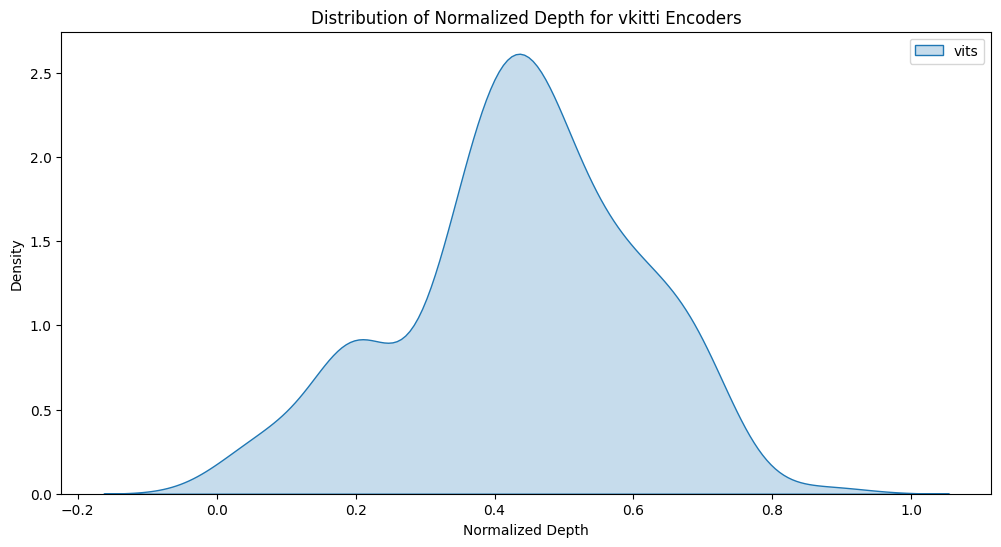

In [8]:
encoders_vkitti = df_vkitti['encoder'].unique()

plt.figure(figsize=(12, 6))

for encoder in encoders_vkitti:
    subset = df_vkitti[df_vkitti['encoder'] == encoder]
    sns.kdeplot(subset['normalized_depth'], label=encoder, shade=True)

plt.title('Distribution of Normalized Depth for vkitti Encoders')
plt.xlabel('Normalized Depth')
plt.ylabel('Density')
plt.legend()
plt.show()


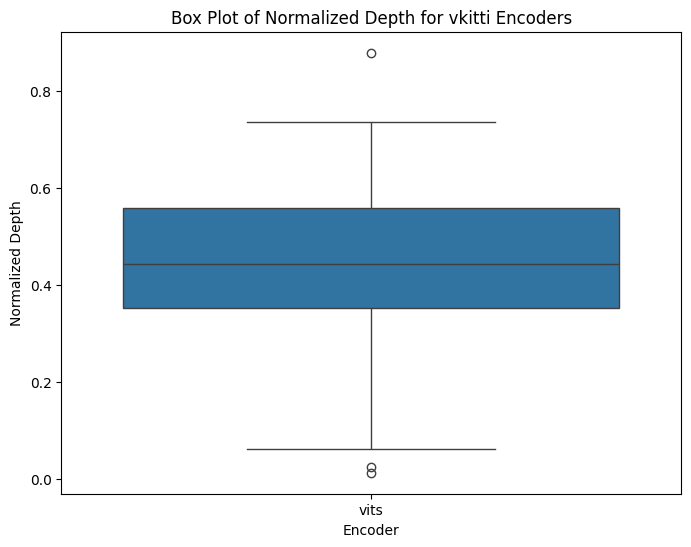

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='encoder', y='normalized_depth', data=df_vkitti)
plt.title('Box Plot of Normalized Depth for vkitti Encoders')
plt.xlabel('Encoder')
plt.ylabel('Normalized Depth')
plt.show()


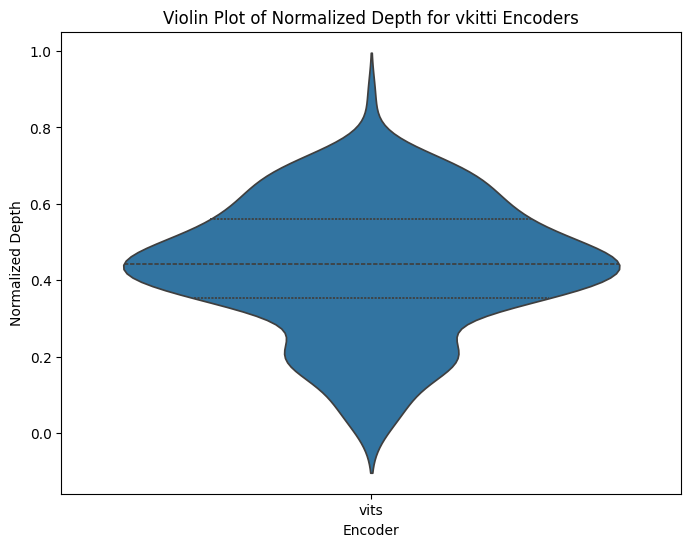

In [10]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='encoder', y='normalized_depth', data=df_vkitti, inner='quartile')
plt.title('Violin Plot of Normalized Depth for vkitti Encoders')
plt.xlabel('Encoder')
plt.ylabel('Normalized Depth')
plt.show()


/tmp/ipykernel_49589/327576340.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['normalized_depth'], label=encoder, shade=True)
/tmp/ipykernel_49589/327576340.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['normalized_depth'], label=encoder, shade=True)
/tmp/ipykernel_49589/327576340.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['normalized_depth'], label=encoder, shade=True)


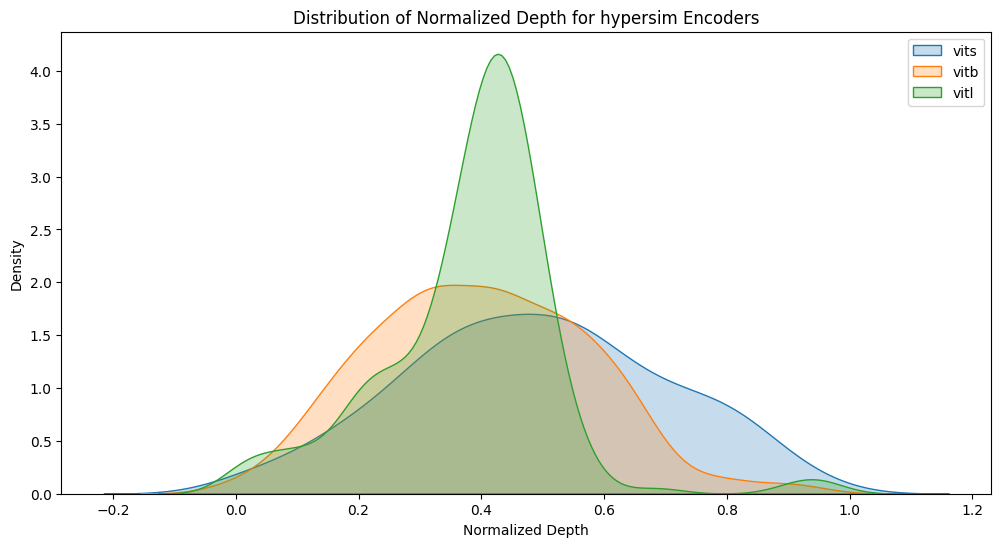

In [11]:
encoders_hypersim = df_hypersim['encoder'].unique()

plt.figure(figsize=(12, 6))

for encoder in encoders_hypersim:
    subset = df_hypersim[df_hypersim['encoder'] == encoder]
    sns.kdeplot(subset['normalized_depth'], label=encoder, shade=True)

plt.title('Distribution of Normalized Depth for hypersim Encoders')
plt.xlabel('Normalized Depth')
plt.ylabel('Density')
plt.legend()
plt.show()


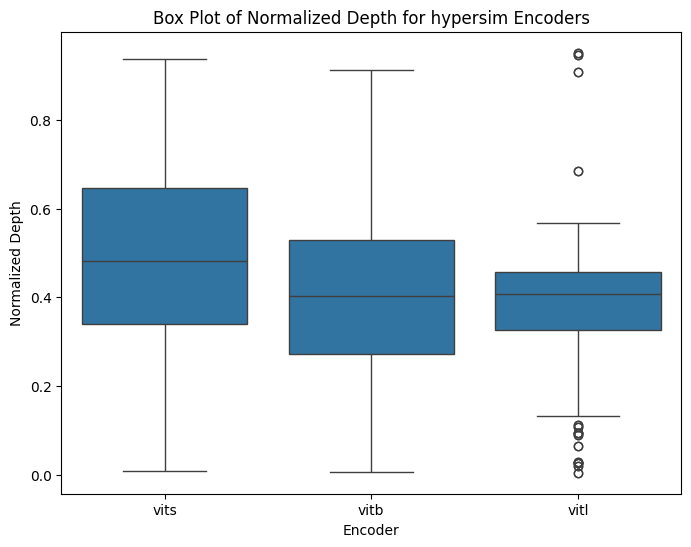

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='encoder', y='normalized_depth', data=df_hypersim)
plt.title('Box Plot of Normalized Depth for hypersim Encoders')
plt.xlabel('Encoder')
plt.ylabel('Normalized Depth')
plt.show()


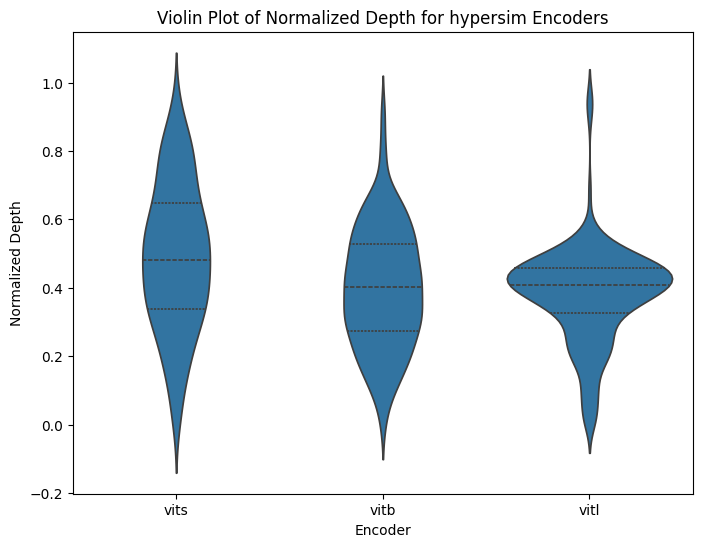

In [13]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='encoder', y='normalized_depth', data=df_hypersim, inner='quartile')
plt.title('Violin Plot of Normalized Depth for hypersim Encoders')
plt.xlabel('Encoder')
plt.ylabel('Normalized Depth')
plt.show()


In [14]:
combined_data = pd.concat([df_vkitti, df_hypersim], ignore_index=True)

/tmp/ipykernel_49589/2211481392.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_vkitti['normalized_depth'], label='vkitti', shade=True)
/tmp/ipykernel_49589/2211481392.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_hypersim['normalized_depth'], label='hypersim', shade=True)


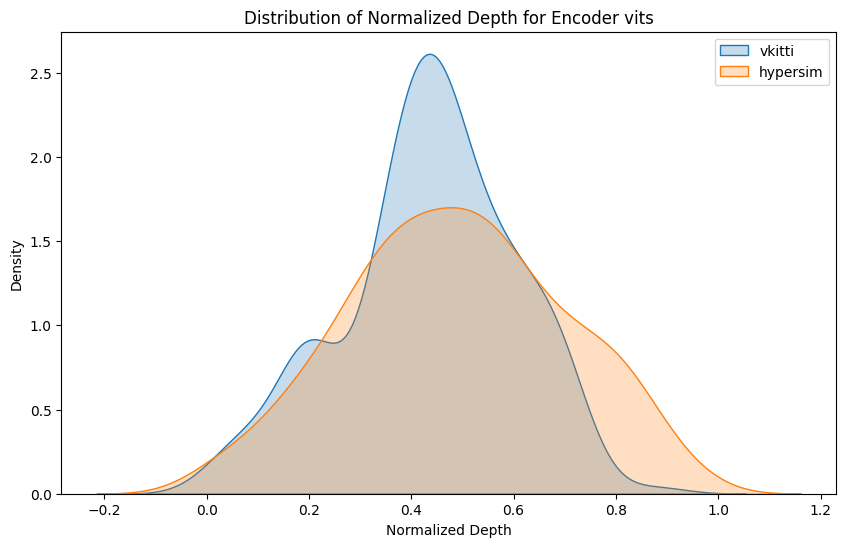

/tmp/ipykernel_49589/2211481392.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_vkitti['normalized_depth'], label='vkitti', shade=True)
/tmp/ipykernel_49589/2211481392.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_hypersim['normalized_depth'], label='hypersim', shade=True)


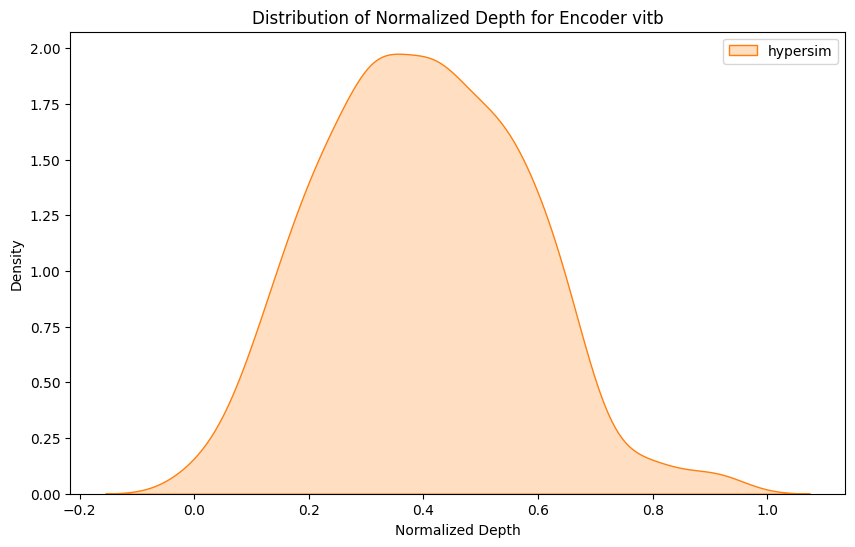

/tmp/ipykernel_49589/2211481392.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_vkitti['normalized_depth'], label='vkitti', shade=True)
/tmp/ipykernel_49589/2211481392.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_hypersim['normalized_depth'], label='hypersim', shade=True)


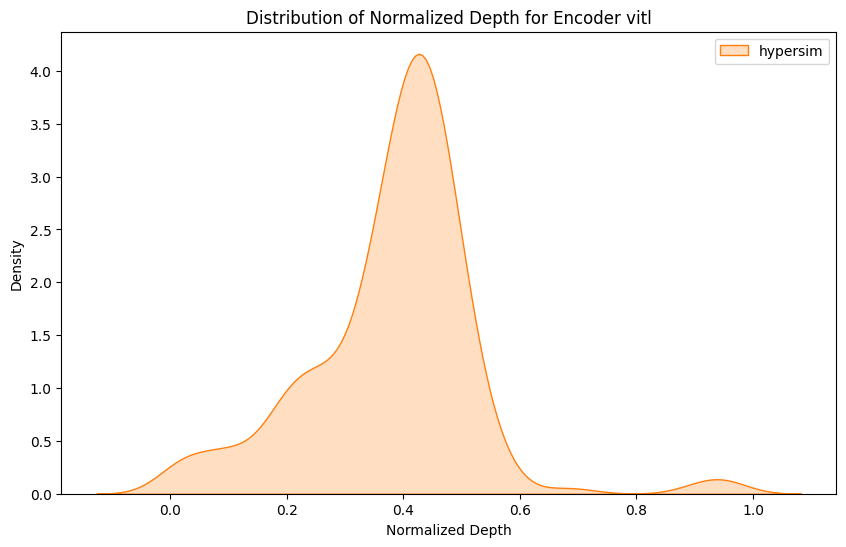

In [15]:
encoders = combined_data['encoder'].unique()

for encoder in encoders:
    plt.figure(figsize=(10, 6))
    subset_vkitti = df_vkitti[df_vkitti['encoder'] == encoder]
    subset_hypersim = df_hypersim[df_hypersim['encoder'] == encoder]
    
    sns.kdeplot(subset_vkitti['normalized_depth'], label='vkitti', shade=True)
    sns.kdeplot(subset_hypersim['normalized_depth'], label='hypersim', shade=True)
    
    plt.title(f'Distribution of Normalized Depth for Encoder {encoder}')
    plt.xlabel('Normalized Depth')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


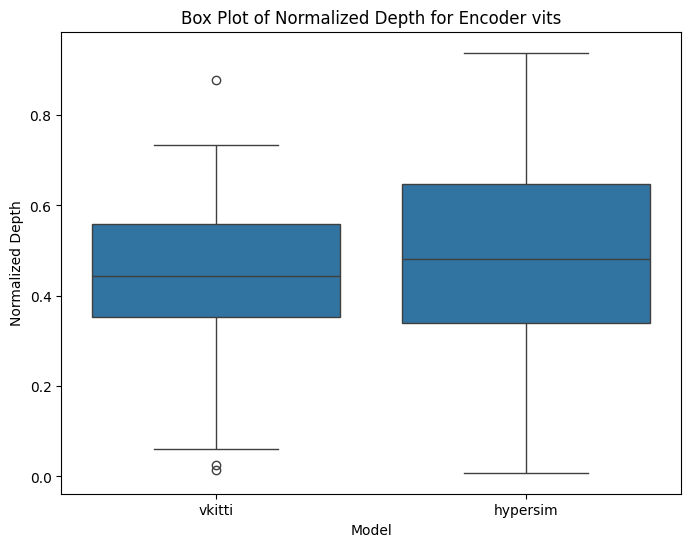

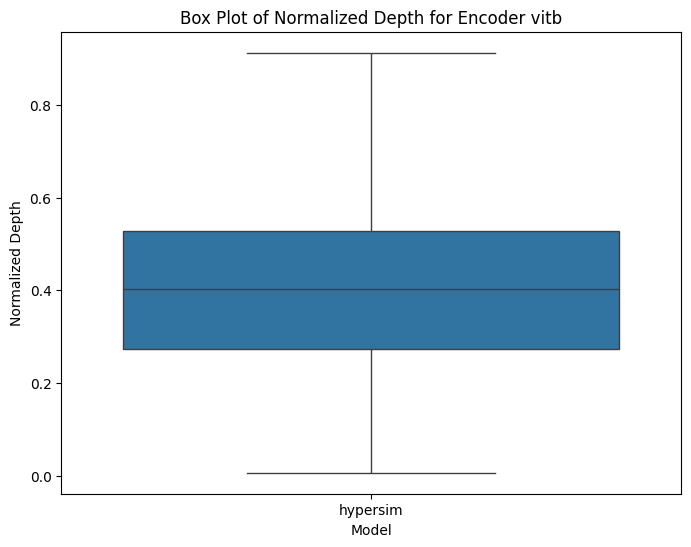

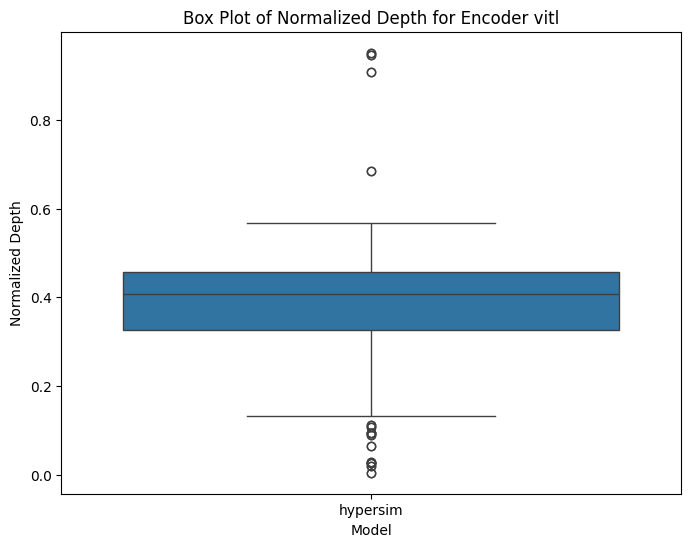

In [16]:
for encoder in encoders:
    plt.figure(figsize=(8, 6))
    subset = combined_data[combined_data['encoder'] == encoder]
    sns.boxplot(x='model', y='normalized_depth', data=subset)
    plt.title(f'Box Plot of Normalized Depth for Encoder {encoder}')
    plt.xlabel('Model')
    plt.ylabel('Normalized Depth')
    plt.show()

In [17]:
# If both datasets have a common key
df_vkitti['frame'] = range(len(df_vkitti))
df_hypersim['frame'] = range(len(df_hypersim))

merged_df = pd.merge(df_vkitti, df_hypersim, on='frame', suffixes=('_vkitti', '_hypersim'))

print("\nMerged DataFrame Sample:")
print(merged_df.head())



Merged DataFrame Sample:
  model_vkitti encoder_vkitti      image_name_vkitti  image_id_vkitti  \
0       vkitti           vits  101_exp92_L_22213.jpg                1   
1       vkitti           vits  101_exp92_L_22213.jpg                1   
2       vkitti           vits  101_exp92_L_22213.jpg                1   
3       vkitti           vits  105_exp96_L_11815.jpg                2   
4       vkitti           vits   116_exp92_L_2546.jpg                3   

   annotation_id_vkitti  frame  normalized_depth_vkitti  z-min_vkitti  \
0                     1      0                 0.683898           0.4   
1                     2      1                 0.655169           0.4   
2                     3      2                 0.734615           0.4   
3                     4      3                 0.700309           0.4   
4                     5      4                 0.632339           0.4   

   z-max_vkitti  value_metric_vkitti model_hypersim encoder_hypersim  \
0          80.0         

In [18]:
merged_df['depth_difference'] = merged_df['normalized_depth_vkitti'] - merged_df['normalized_depth_hypersim']

print("\nDepth Differences:")
print(merged_df[['frame', 'encoder_vkitti', 'encoder_hypersim', 'depth_difference']])



Depth Differences:
     frame encoder_vkitti encoder_hypersim  depth_difference
0        0           vits             vits          0.427841
1        1           vits             vits          0.508372
2        2           vits             vits          0.437021
3        3           vits             vits         -0.130094
4        4           vits             vits          0.341834
..     ...            ...              ...               ...
177    177           vits             vits          0.050107
178    178           vits             vits         -0.337477
179    179           vits             vits          0.505111
180    180           vits             vits          0.029439
181    181           vits             vits         -0.125588

[182 rows x 4 columns]


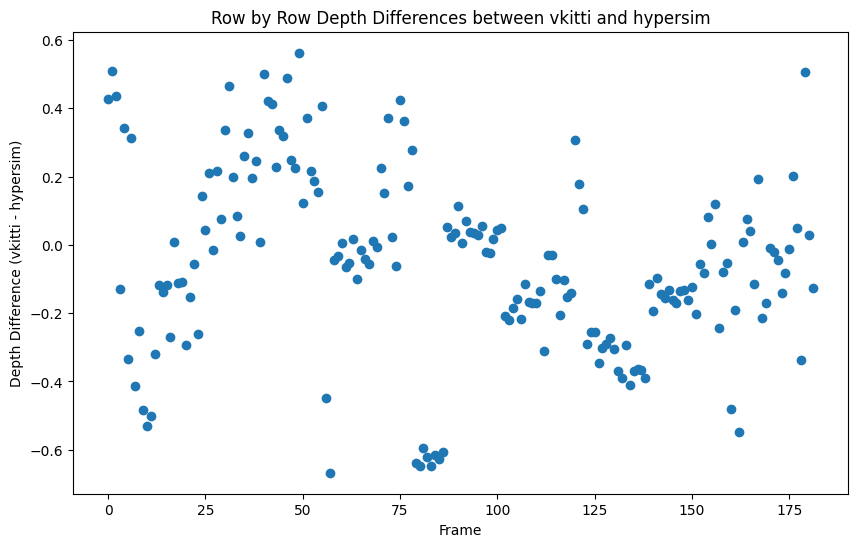

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['frame'], merged_df['depth_difference'], marker='o', linestyle='none')
plt.title('Row by Row Depth Differences between vkitti and hypersim')
plt.xlabel('Frame')
plt.ylabel('Depth Difference (vkitti - hypersim)')
plt.show()


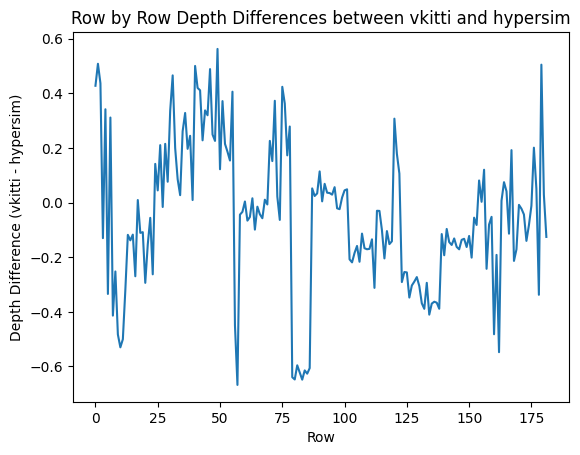

In [21]:
plt.plot(merged_df['depth_difference'], marker="o")
plt.title('Row by Row Depth Differences between vkitti and hypersim')
plt.xlabel('Row')
plt.ylabel('Depth Difference (vkitti - hypersim)')
plt.show()